# Will a driving customer accept a random restaurant coupon?

## Overview:

Analysis of factors that may influence customer acceptance of restaurant coupons delivered while driving through town. Would you accept a coupon and take a short detour to a restaraunt, if presented with the option?

## Data:

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’. There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50).

## Data Description:

Keep in mind that these values mentioned below are average values.

The attributes of this data set include:

1. User attributes:
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes:
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes:
    - time before it expires: 2 hours or one day

## Data upload, cleaning, and validation

In [1]:
#Read in Libraries and Packages

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/coupons.csv')

In [3]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
# Summary statistics for numerical columns
summary_stats_numerical = df.describe()

# Summary statistics for all columns, including categorical ones
summary_stats_all = df.describe(include='all')

print("Summary Statistics (Numerical):")
print(summary_stats_numerical)

print("\nSummary Statistics (All Columns):")
print(summary_stats_all)


Summary Statistics (Numerical):
        temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12684.000000  12684.000000           12684.0       12684.000000   
mean      63.301798      0.414144               1.0           0.561495   
std       19.154486      0.492593               0.0           0.496224   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12684.000000    12684.000000   12684.000000  12684.000000  
mean            0.119126        0.214759       0.785241      0.568433  
std             0.323950        0.410671       0.410671      0.495314  
min          

In [6]:
# Identify missing values in each column
missing_values = df.isna().sum()

# Filter to show only columns with missing values
missing_columns = missing_values[missing_values > 0]

print("Columns with missing values:")
print(missing_columns)

Columns with missing values:
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64


In [7]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isna().mean() * 100

# Filter to show only columns with missing values
missing_percentage = missing_percentage[missing_percentage > 0]

missing_percentage.sort_values(ascending=False)


car                     99.148534
CoffeeHouse              1.710817
Restaurant20To50         1.490066
CarryAway                1.190476
RestaurantLessThan20     1.024913
Bar                      0.843582
dtype: float64

In [8]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
     destination passanger weather  temperature  time                 coupon  \
4192        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4236        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4280        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4324        Work     Alone   Sunny           80   7AM  Carry out & Take away   
4409        Work     Alone   Sunny           80   7AM  Carry out & Take away   
...          ...       ...     ...          ...   ...                    ...   
8511        Home     Alone   Sunny           80   6PM                    Bar   
8512        Home   Partner   Sunny           30  10PM  Carry out & Take away   
8513        Work     Alone   Rainy           55   7AM        Restaurant(<20)   
8515        Work     Alone   Snowy           30   7AM      Restaurant(20-50)   
8516        Work     Alone   Sunny           80   7AM        Restaurant(<20)   

     expiration  gender

In [9]:
# Check for unique values in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    unique_values = df[col].unique()
    print(f"Unique values in {col}: {unique_values}")


Unique values in destination: ['No Urgent Place' 'Home' 'Work']
Unique values in passanger: ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
Unique values in weather: ['Sunny' 'Rainy' 'Snowy']
Unique values in time: ['2PM' '10AM' '6PM' '7AM' '10PM']
Unique values in coupon: ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
Unique values in expiration: ['1d' '2h']
Unique values in gender: ['Female' 'Male']
Unique values in age: ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
Unique values in maritalStatus: ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
Unique values in education: ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
Unique values in occupation: ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'A

In [10]:
# Need to drop the 'car' column due to its high percentage of missing values
df.drop(columns=['car'], inplace=True)

# Columns with missing data that are suitable for mode imputation
columns_to_impute = ['CoffeeHouse', 'Restaurant20To50', 'CarryAway', 'RestaurantLessThan20', 'Bar']

# Impute missing values in these columns with the mode
for col in columns_to_impute:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verify that there are no missing values left in the dataset
missing_values_after = df.isna().sum()

missing_values_after

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [11]:
# Calculate the proportion of people who accepted the coupon (Y=1)
proportion_accepted = df['Y'].mean()

proportion_accepted

0.5684326710816777

~57% of customers accepted coupons in this sample!

## Analysis of overall coupon offerings by type

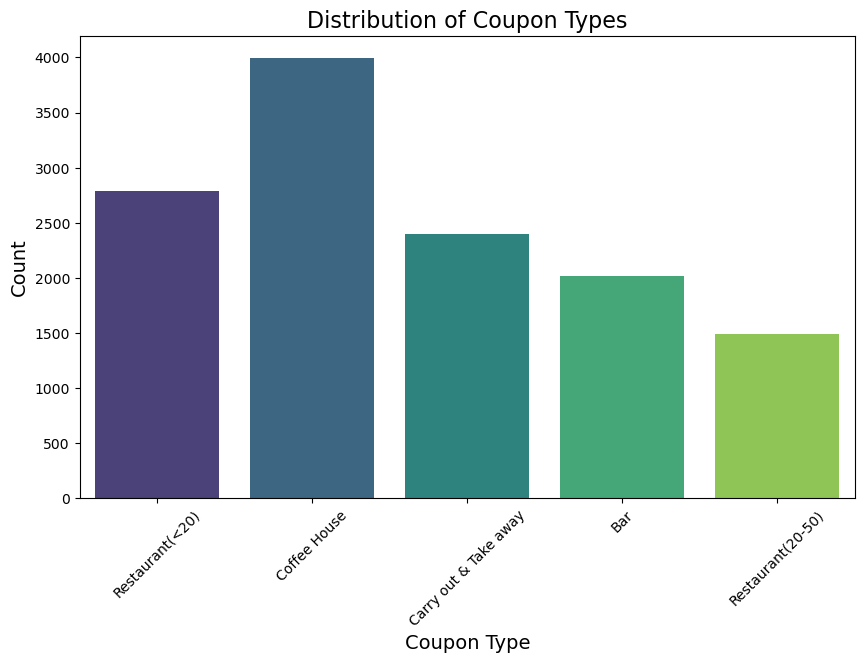

In [12]:
# Create a bar plot to visualize the distribution of the 'coupon' column
plt.figure(figsize=(10, 6))
sns.countplot(x='coupon', data=df, palette='viridis')

# Add title and labels
plt.title('Distribution of Coupon Types', fontsize=16)
plt.xlabel('Coupon Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()

Most of the coupons offered were for coffee houses, followed by less expensive restaunts (price of $20 or less for menu items).

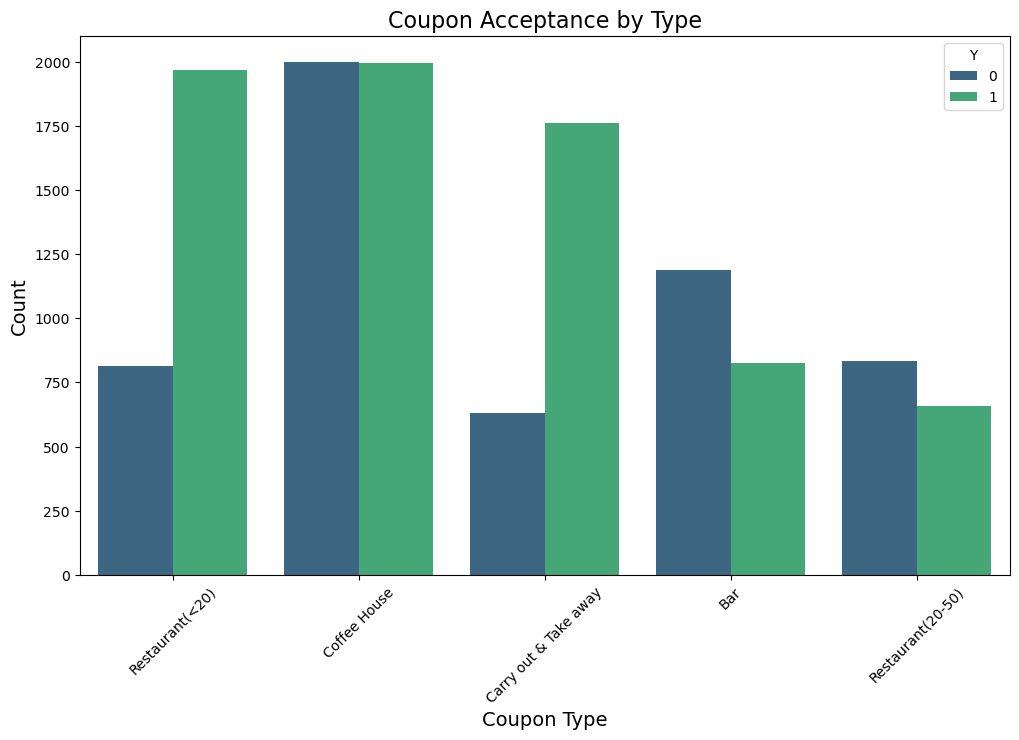

In [13]:
# Create a bar plot that shows the count of 'Yes' and 'No' (acceptance) for each coupon type
plt.figure(figsize=(12, 7))
sns.countplot(x='coupon', hue='Y', data=df, palette='viridis')

# Add title and labels
plt.title('Coupon Acceptance by Type', fontsize=16)
plt.xlabel('Coupon Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()

Coffee houses were the most frequently recommended, but also represent a pretty even split across acceptance and non-acceptance. Low-cost restaurants and carry out & take away, were the coupons with the highest acceptance rates vs non-acceptance of offer.

## Distribution of temperatures at time of coupon offering

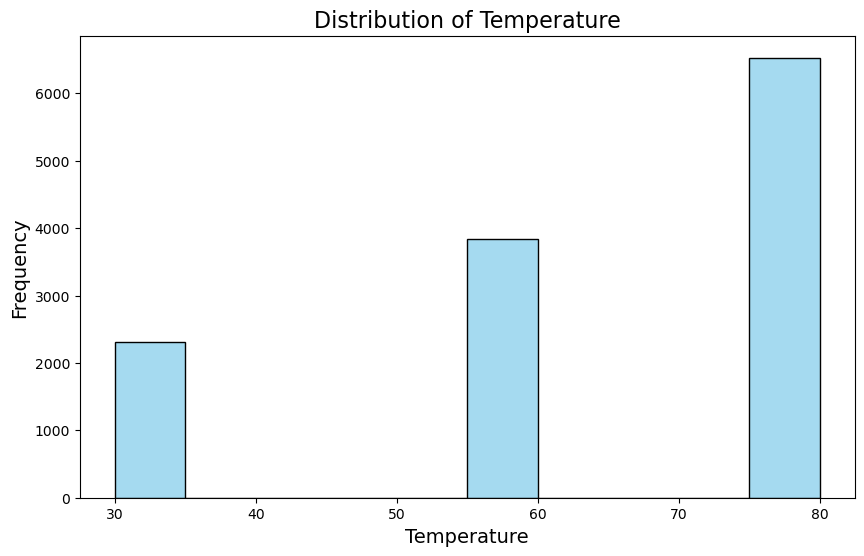

In [14]:
# Create a histogram to visualize the distribution of the 'temperature' column
plt.figure(figsize=(10, 6))
sns.histplot(df['temperature'], bins=10, kde=False, color='skyblue')

# Add title and labels
plt.title('Distribution of Temperature', fontsize=16)
plt.xlabel('Temperature', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show plot
plt.show()

Most of the time, coupons were offered during higher temperatures, followed by mid- and then low-temperatures.

## Analysis of bar coupon offerings

In [15]:
# Create a new DataFrame that only includes rows where the coupon type is 'Bar'
df_bar_coupons = df[df['coupon'] == 'Bar']

# Display the first few rows of the new DataFrame
df_bar_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


In [16]:
# Segment the data based on the number of bar visits using .loc
df_bar_coupons.loc[:, 'Bar_Segment'] = df_bar_coupons['Bar'].apply(
    lambda x: '3 or fewer times' if x in ['never', 'less1', '1~3'] else 'More than 3 times'
)

# Display the first few rows to confirm the segmentation
df_bar_coupons[['Bar', 'Bar_Segment']].head()

/var/folders/97/j8qj4t8d2n34r7s9fkzkk5gc0000gn/T/ipykernel_42916/3991249136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bar_coupons.loc[:, 'Bar_Segment'] = df_bar_coupons['Bar'].apply(


,Bar,Bar_Segment
9,never,3 or fewer times
13,never,3 or fewer times
17,never,3 or fewer times
24,never,3 or fewer times
35,never,3 or fewer times


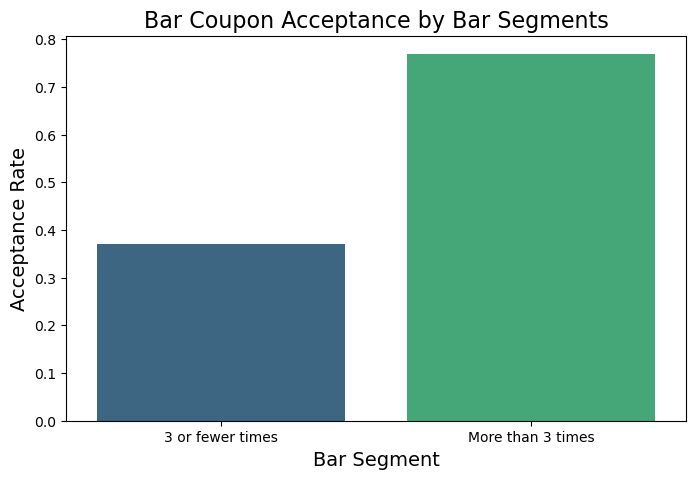

Bar_Segment
3 or fewer times     0.370737
More than 3 times    0.768844
Name: Y, dtype: float64

In [17]:
# Calculate the acceptance rate of Bar coupons by the 'Bar_Segment'
bar_segment_acceptance = df_bar_coupons.groupby('Bar_Segment')['Y'].mean()

# Plot the acceptance rate by bar segments
plt.figure(figsize=(8, 5))
sns.barplot(x=bar_segment_acceptance.index, y=bar_segment_acceptance.values, palette='viridis')

# Add title and labels
plt.title('Bar Coupon Acceptance by Bar Segments', fontsize=16)
plt.xlabel('Bar Segment', fontsize=14)
plt.ylabel('Acceptance Rate', fontsize=14)

# Show plot
plt.show()

# Display the calculated acceptance rates
bar_segment_acceptance

In [19]:
# Find the distinct ages in the 'age' column of the df_bar_coupons DataFrame
distinct_ages = df_bar_coupons['age'].unique()

# Sort the distinct ages for better readability
distinct_ages_sorted = sorted(distinct_ages)

# Display the distinct ages
print(distinct_ages_sorted)

['21', '26', '31', '36', '41', '46', '50plus', 'below21']


#### ***Because the age variable includes age categories, I have to map to numerical values to continue with the age splitting

In [21]:
# Create a mapping for age categories to numerical values
age_mapping = {
    'below21': 20,   # Assign a value less than 25
    '21': 21,
    '26': 26,
    '31': 31,
    '36': 36,
    '41': 41,
    '46': 46,
    '50plus': 50    # Assign a value greater than 25
}

# Apply the mapping to the 'age' column
df_bar_coupons.loc[:, 'age_numeric'] = df_bar_coupons['age'].map(age_mapping)

df_bar_coupons.head()


/var/folders/97/j8qj4t8d2n34r7s9fkzkk5gc0000gn/T/ipykernel_42916/1654830362.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bar_coupons.loc[:, 'age_numeric'] = df_bar_coupons['age'].map(age_mapping)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Bar_Segment,age_numeric
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,4~8,1~3,1,1,0,0,1,0,3 or fewer times,21
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,4~8,1~3,1,0,0,1,0,1,3 or fewer times,21
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,4~8,1~3,1,1,1,0,1,0,3 or fewer times,21
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,4~8,less1,1,0,0,0,1,1,3 or fewer times,21
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,4~8,less1,1,0,0,1,0,1,3 or fewer times,21


In [22]:
# Now create the condition for those who go to a bar more than once a month and are over the age of 25
condition = (df_bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & (df_bar_coupons['age_numeric'] > 25)

# Calculate the acceptance rate for this specific group
acceptance_rate_specific_group = df_bar_coupons[condition]['Y'].mean()

# Calculate the acceptance rate for all other drivers
acceptance_rate_others = df_bar_coupons[~condition]['Y'].mean()

# Output the results
print("Acceptance Rate for Specific Group:", acceptance_rate_specific_group)
print("Acceptance Rate for All Others:", acceptance_rate_others)

Acceptance Rate for Specific Group: 0.6952380952380952
Acceptance Rate for All Others: 0.33500313087038197


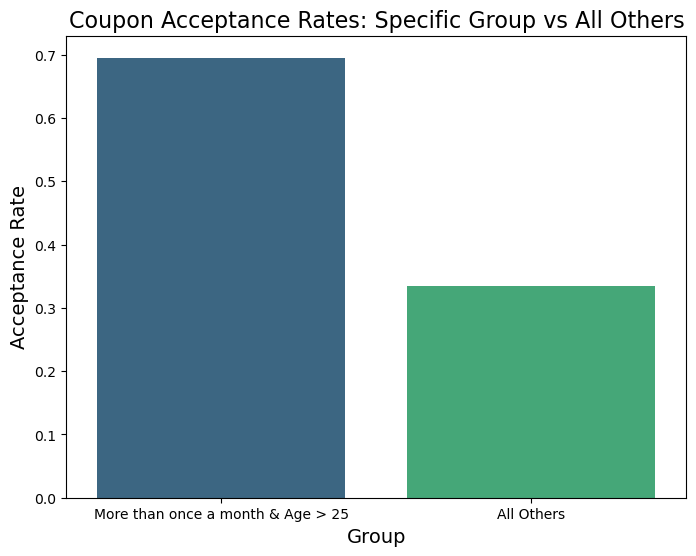

In [23]:
# Plot the acceptance rates for the specific group and others

# Create a DataFrame for easier plotting
acceptance_rates = pd.DataFrame({
    'Group': ['More than once a month & Age > 25', 'All Others'],
    'Acceptance Rate': [acceptance_rate_specific_group, acceptance_rate_others]
})

# Plot the acceptance rates
plt.figure(figsize=(8, 6))
sns.barplot(x='Group', y='Acceptance Rate', data=acceptance_rates, palette='viridis')

# Add title and labels
plt.title('Coupon Acceptance Rates: Specific Group vs All Others', fontsize=16)
plt.xlabel('Group', fontsize=14)
plt.ylabel('Acceptance Rate', fontsize=14)

# Show plot
plt.show()

Splitting by customers that go to bars more than once a month and are over age 25, versus all others, we see a distinct difference in acceptance of bar coupons - almost a 36 percentage-point increase (~70% of customers fitting the description vs ~34% of all others).

In [24]:
# Create a condition for the specific group
condition = (
    df_bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8']) & 
    (df_bar_coupons['passanger'] != 'Kid(s)') &
    (~df_bar_coupons['occupation'].isin(['Farming', 'Fishing', 'Forestry']))
)

# Calculate the acceptance rate for this specific group
acceptance_rate_specific_group = df_bar_coupons[condition]['Y'].mean()

# Calculate the acceptance rate for all other drivers
acceptance_rate_others = df_bar_coupons[~condition]['Y'].mean()

# Output the results
print("Acceptance Rate for Specific Group:", acceptance_rate_specific_group)
print("Acceptance Rate for All Others:", acceptance_rate_others)

Acceptance Rate for Specific Group: 0.7132486388384754
Acceptance Rate for All Others: 0.296043656207367


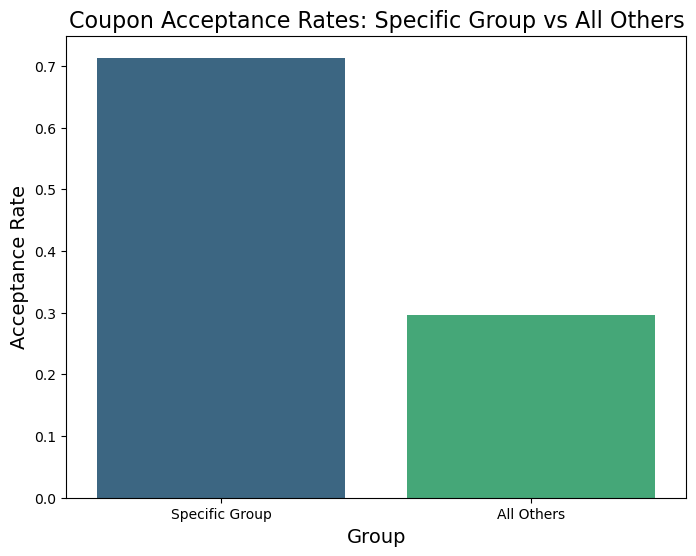

In [25]:
# Create the condition for the specific group
condition = (
    df_bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8']) & 
    (df_bar_coupons['passanger'] != 'Kid(s)') &
    (~df_bar_coupons['occupation'].isin(['Farming', 'Fishing', 'Forestry']))
)

# Calculate the acceptance rate for the specific group
acceptance_rate_specific_group = df_bar_coupons[condition]['Y'].mean()

# Calculate the acceptance rate for all other drivers
acceptance_rate_others = df_bar_coupons[~condition]['Y'].mean()

# Create a DataFrame for plotting
acceptance_rates = pd.DataFrame({
    'Group': ['Specific Group', 'All Others'],
    'Acceptance Rate': [acceptance_rate_specific_group, acceptance_rate_others]
})

# Plot the acceptance rates
plt.figure(figsize=(8, 6))
sns.barplot(x='Group', y='Acceptance Rate', data=acceptance_rates, palette='viridis')

# Add title and labels
plt.title('Coupon Acceptance Rates: Specific Group vs All Others', fontsize=16)
plt.xlabel('Group', fontsize=14)
plt.ylabel('Acceptance Rate', fontsize=14)

# Show the plot
plt.show()

Splitting by customers that go to bars more than once, without kids as passengers, and are not in 'Fishing', 'Farming', or 'Forestry' industries, versus all others, we see a distinct difference in acceptance of bar coupons as well - an approximately 41 percentage-point increase (~71% of customers fitting the description vs ~30% of all others).

In [27]:
# Check the data type of the 'income' column
print("Data type of 'income':", df_bar_coupons['income'].dtype)

# Check the unique values in the 'income' column to identify any issues
unique_incomes = df_bar_coupons['income'].unique()
print("Unique values in the 'income' column:", unique_incomes)

Data type of 'income': object
Unique values in the 'income' column: ['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']


#### **Because the income variable includes categories, like the age variable, I have to map to numerical values in order to complete the segmentation

/var/folders/97/j8qj4t8d2n34r7s9fkzkk5gc0000gn/T/ipykernel_42916/871802710.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bar_coupons.loc[:, 'income_numeric'] = df_bar_coupons['income'].map(income_mapping)


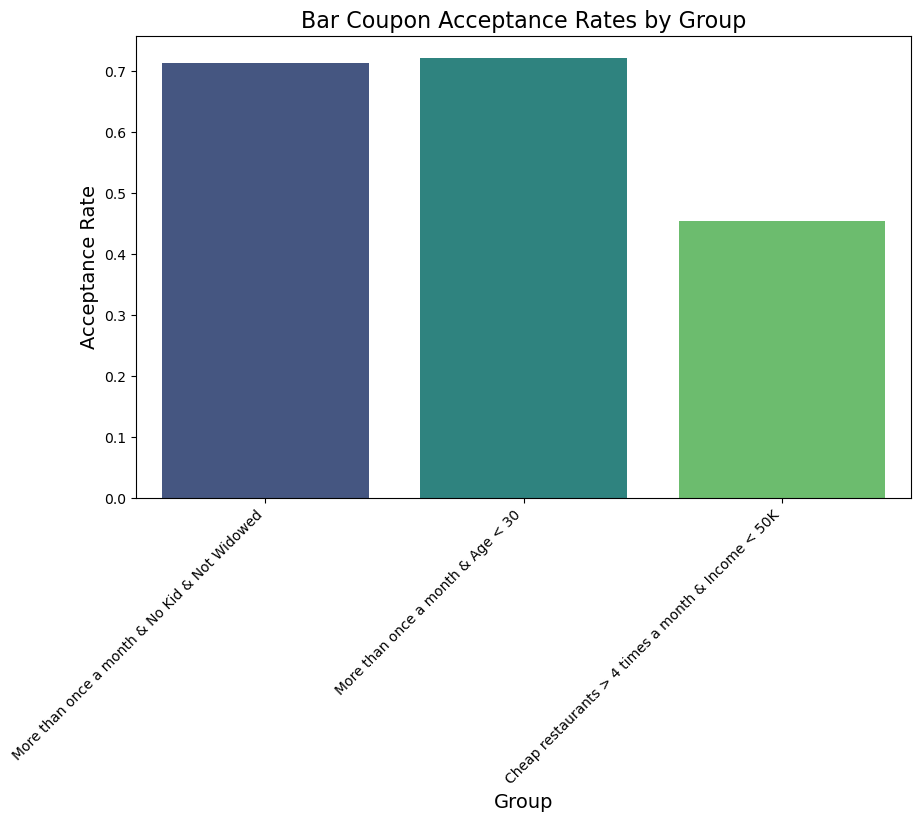

In [28]:
# Income mapping based on the actual income ranges in the dataset
income_mapping = {
    '$37500 - $49999': 43750,
    '$62500 - $74999': 68750,
    '$12500 - $24999': 18750,
    '$75000 - $87499': 81250,
    '$50000 - $62499': 56250,
    '$25000 - $37499': 31250,
    '$100000 or More': 100000,
    '$87500 - $99999': 93750,
    'Less than $12500': 12500
}
df_bar_coupons.loc[:, 'income_numeric'] = df_bar_coupons['income'].map(income_mapping)

# Creating the three conditional groups

# 1. Go to bars more than once a month, had passengers that were not a kid, and were not widowed
condition_1 = (
    df_bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8']) & 
    (df_bar_coupons['passanger'] != 'Kid(s)') &
    (df_bar_coupons['maritalStatus'] != 'Widowed')
)

# 2. Go to bars more than once a month and are under the age of 30
condition_2 = (
    df_bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8']) &
    (df_bar_coupons['age_numeric'] < 30)
)

# 3. Go to cheap restaurants more than 4 times a month and income is less than 50K
condition_3 = (
    df_bar_coupons['RestaurantLessThan20'].isin(['4~8', 'gt8']) &
    (df_bar_coupons['income_numeric'] < 50000)
)

# Calculate the acceptance rate for each group
acceptance_rate_1 = df_bar_coupons[condition_1]['Y'].mean()
acceptance_rate_2 = df_bar_coupons[condition_2]['Y'].mean()
acceptance_rate_3 = df_bar_coupons[condition_3]['Y'].mean()

# Create a DataFrame for plotting
acceptance_rates = pd.DataFrame({
    'Group': [
        'More than once a month & No Kid & Not Widowed',
        'More than once a month & Age < 30',
        'Cheap restaurants > 4 times a month & Income < 50K'
    ],
    'Acceptance Rate': [acceptance_rate_1, acceptance_rate_2, acceptance_rate_3]
})

# Plot the acceptance rates
plt.figure(figsize=(10, 6))
sns.barplot(x='Group', y='Acceptance Rate', data=acceptance_rates, palette='viridis')

# Add title and labels
plt.title('Bar Coupon Acceptance Rates by Group', fontsize=16)
plt.xlabel('Group', fontsize=14)
plt.ylabel('Acceptance Rate', fontsize=14)

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

Looking at three additional groups, with the conditions listed for each bar in the above chart, we can see customers that have visited a bar at least once a month over-index on accepting the bar coupon, versus those that have not. That is reinforced in an earlier plot, which showed that a higher volume of bar visits led to higher acceptance rates as well.

## Analysis of coffee house coupon recipients

Since coffee house coupons were the most received, I wanted to dive deeper into any sources of differentiation regarding coupon acceptance for this group. There is essentially a 50/50 split as to acceptance/non-acceptance of the coffee house coupons, so I hope to find a variable that can help to explain the differences.

In [45]:
# Create a new DataFrame that only includes rows where the coupon type is 'Coffee House'
df_coffee_coupons = df[df['coupon'] == 'Coffee House']

# Filter for Coffee House coupons
df_coffee_coupons = df[df['coupon'] == 'Coffee House'].copy()

# Display the first few rows of the new DataFrame
df_coffee_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0


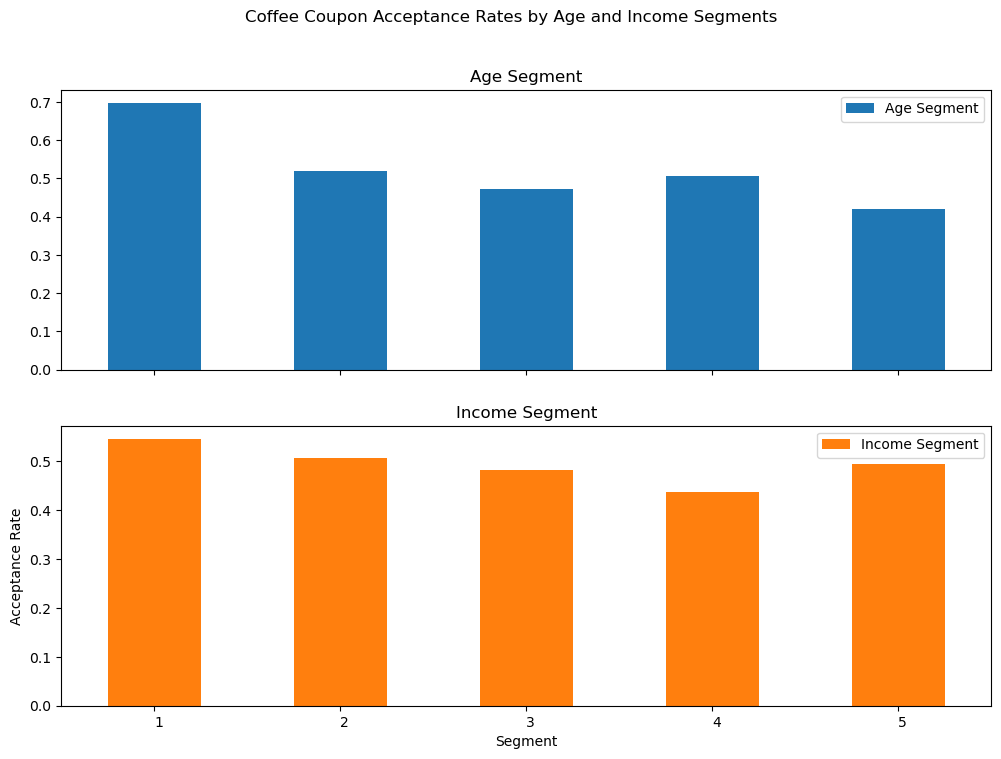

In [46]:
# Create more detailed age-based segments
age_mapping = {
    'below21': 1,   # Below 21
    '21': 2,        # 21 to 30
    '26': 2,
    '31': 3,        # 31 to 40
    '36': 3,
    '41': 4,        # 41 to 50
    '46': 4,
    '50plus': 5     # Above 50
}

# Apply the age mapping
df_coffee_coupons['age_segment'] = df_coffee_coupons['age'].map(age_mapping)

# Define more detailed income-based segments
income_mapping = {
    'Less than $12500': 1,  # Less than $25,000
    '$12500 - $24999': 1,
    '$25000 - $37499': 2,   # $25,000 - $49,999
    '$37500 - $49999': 2,
    '$50000 - $62499': 3,   # $50,000 - $74,999
    '$62500 - $74999': 3,
    '$75000 - $87499': 4,   # $75,000 - $99,999
    '$87500 - $99999': 4,
    '$100000 or More': 5    # $100,000 and above
}

# Apply the income mapping
df_coffee_coupons['income_segment'] = df_coffee_coupons['income'].map(income_mapping)

# Calculate acceptance rates by age segment
age_acceptance_rates = df_coffee_coupons.groupby('age_segment')['Y'].mean()

# Calculate acceptance rates by income segment
income_acceptance_rates = df_coffee_coupons.groupby('income_segment')['Y'].mean()

# Prepare data for visualization
acceptance_rates_df = pd.DataFrame({
    'Age Segment': age_acceptance_rates,
    'Income Segment': income_acceptance_rates
})

# Plot the acceptance rates for different segments
acceptance_rates_df.plot(kind='bar', figsize=(12, 8), subplots=True)
plt.suptitle('Coffee Coupon Acceptance Rates by Age and Income Segments')
plt.xlabel('Segment')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=0, ha='left')
plt.show()

Segmenting by age category and income category, I see similar acceptance rates across categories, with a slight over-index in the youngest category (customers under age 21). The other rates are around 50%, which is expected given that the overall acceptance rate is about 50%. I will look at other features that are correlated with acceptance of coupons and dive deeper into those specific variables.

Top 3 Correlated Factors with Coupon Acceptance:
CoffeeHouse_encoded    0.330134
employment_encoded    -0.116383
toCoupon_GEQ15min     -0.094104
Name: Y, dtype: float64


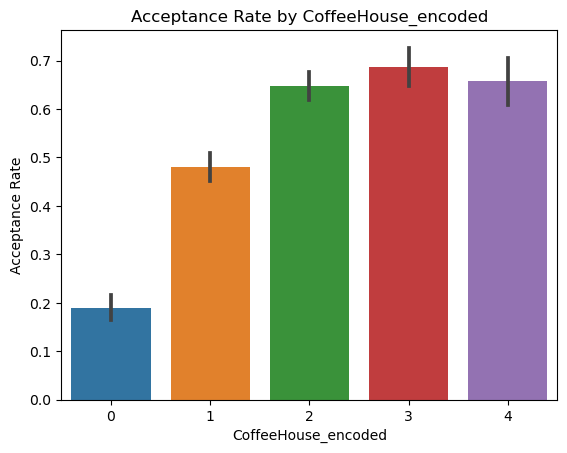

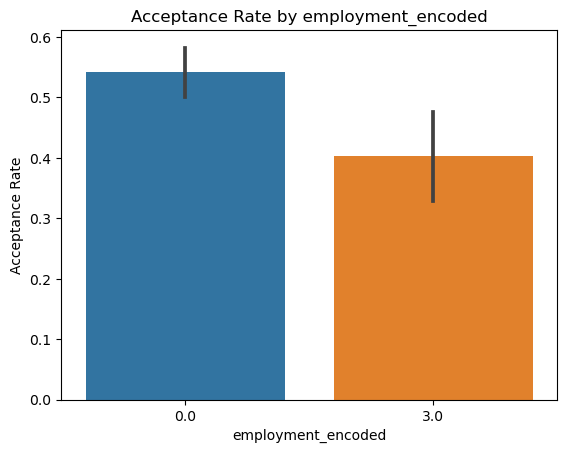

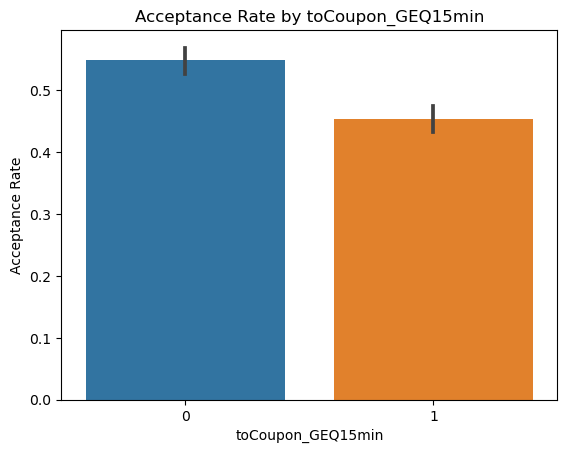

In [52]:
# Encoding categorical variables
gender_mapping = {'Male': 0, 'Female': 1}
df_coffee_coupons['gender_encoded'] = df_coffee_coupons['gender'].map(gender_mapping)

marital_status_mapping = {'Single': 1, 'Married': 2, 'Divorced': 3, 'Widowed': 4}
df_coffee_coupons['marital_status_encoded'] = df_coffee_coupons['maritalStatus'].map(marital_status_mapping)

education_mapping = {'None': 0, 'High School': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4}
df_coffee_coupons['education_encoded'] = df_coffee_coupons['education'].map(education_mapping)

employment_mapping = {'Unemployed': 0, 'Employed': 1, 'Self-employed': 2, 'Retired': 3}
df_coffee_coupons['employment_encoded'] = df_coffee_coupons['occupation'].map(employment_mapping)

frequency_mapping = {'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4}
df_coffee_coupons['Bar_encoded'] = df_coffee_coupons['Bar'].map(frequency_mapping)
df_coffee_coupons['CoffeeHouse_encoded'] = df_coffee_coupons['CoffeeHouse'].map(frequency_mapping)
df_coffee_coupons['CarryAway_encoded'] = df_coffee_coupons['CarryAway'].map(frequency_mapping)
df_coffee_coupons['RestaurantLessThan20_encoded'] = df_coffee_coupons['RestaurantLessThan20'].map(frequency_mapping)
df_coffee_coupons['Restaurant20To50_encoded'] = df_coffee_coupons['Restaurant20To50'].map(frequency_mapping)

# Calculate the correlation matrix
correlation_matrix = df_coffee_coupons.corr()

# Extract the correlations with 'Y'
abs_correlations_with_Y = correlation_matrix['Y'].abs().sort_values(ascending=False)

# Identify the top 3 correlated variables
top_3_correlated_factors = abs_correlations_with_Y.index[1:4]  # Exclude 'Y' itself

print("Top 3 Correlated Factors with Coupon Acceptance:")
print(correlations_with_Y[top_3_correlated_factors])

# Plot the acceptance rates for each of the top three correlated factors
for factor in top_3_correlated_factors:
    sns.barplot(x=factor, y='Y', data=df_coffee_coupons)
    plt.title(f'Acceptance Rate by {factor}')
    plt.ylabel('Acceptance Rate')
    plt.xlabel(factor)
    plt.show()

After identifying the top three variables correlated with coffee coupon acceptance, I split those variables across categories and calculated their individual acceptance rates. Unsurprisingly, customers having less than 1 visits per month to coffee houses led to the lowest acceptance rate, by far, at ~19% acceptance (well below the 57% average). This is in line with the bar coupon acceptance as well - customers that frequent the places that match the coupon they received are most likely to accept the respective coupon.